# by : Yosri Mehjoubi 

# Methodologie utilise dans Identification 

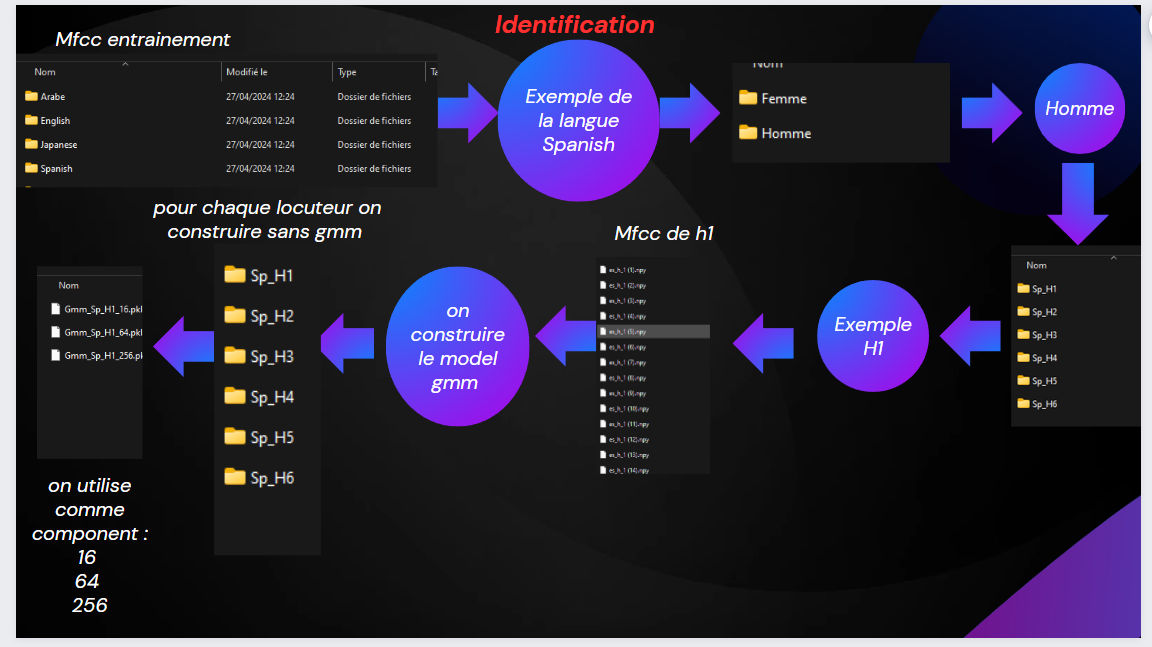

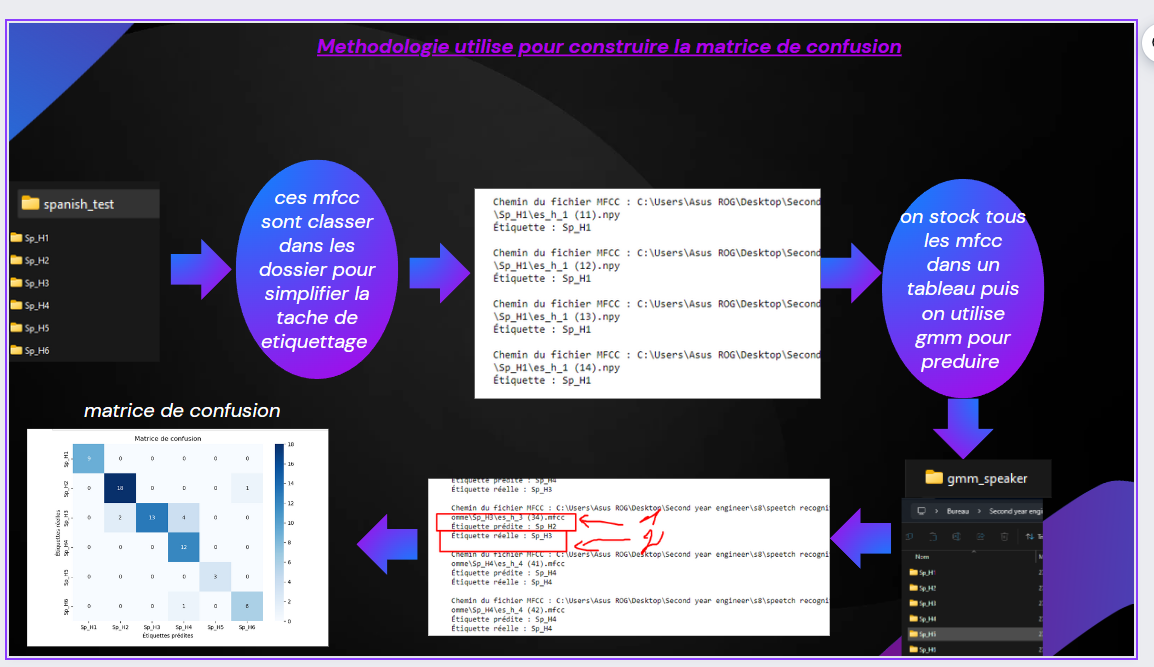

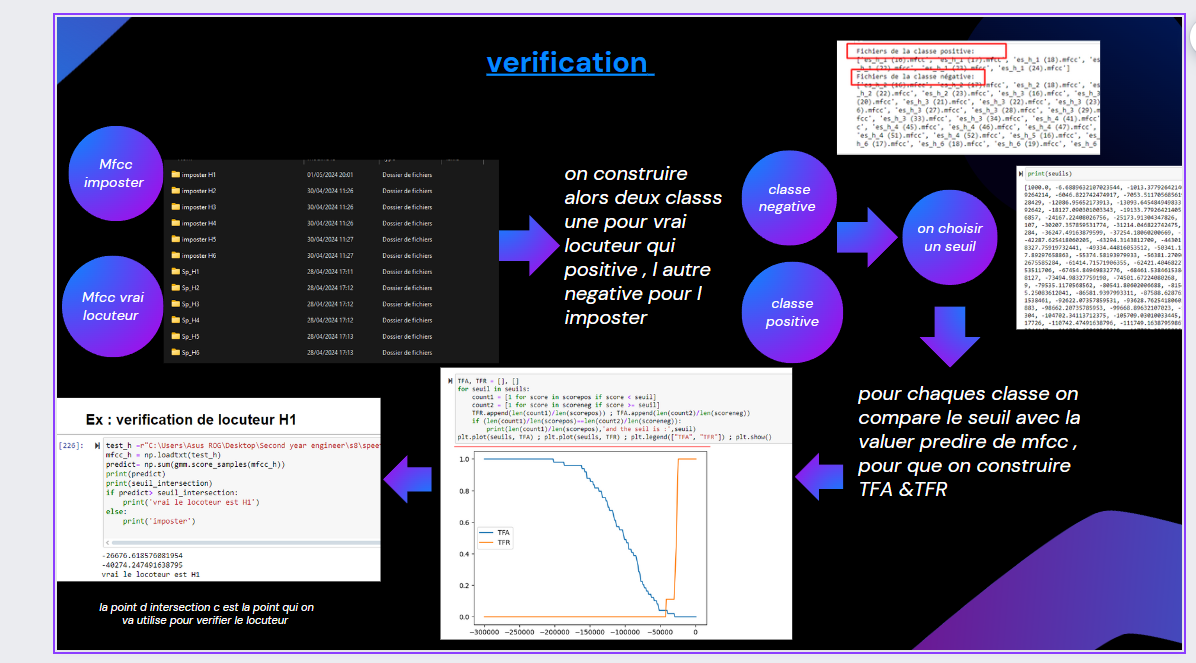

# chercher le seuil des Hommes spanish 

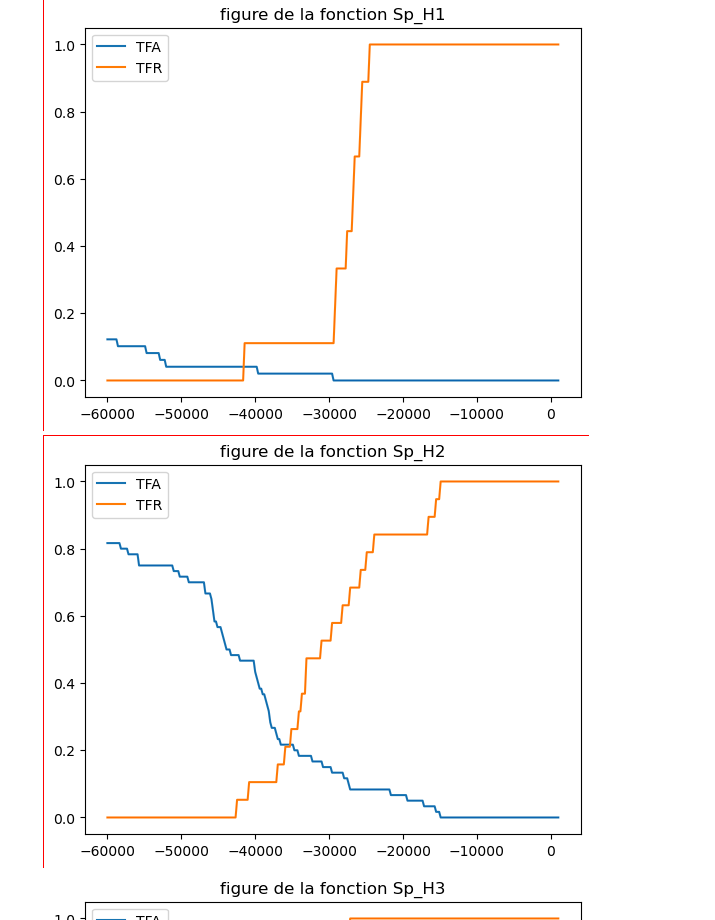

# seuils des femme spanish  

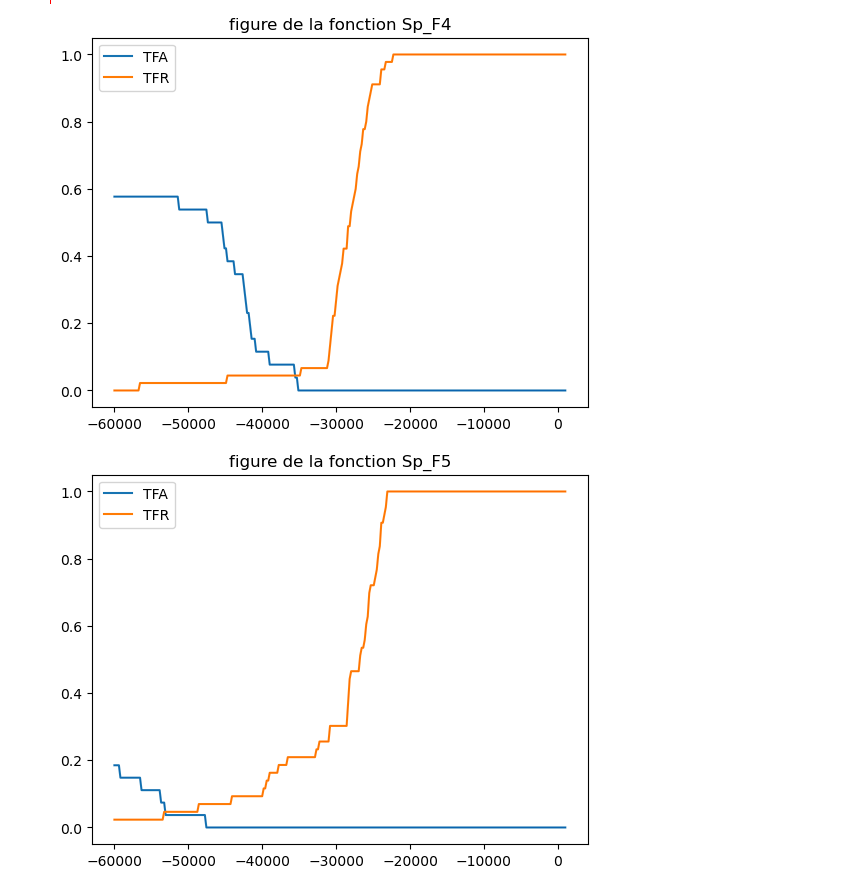

# cette partie de code cree les models gmm pour tous les locuteurs spanish
# H1 a H6

In [122]:
import os
import numpy as np
from sklearn.mixture import GaussianMixture
import joblib

# Liste des sous-dossiers
h = ["Sp_H1","sp_H2", "Sp_H3", "Sp_H4", "Sp_H5", "Sp_H6"]

for hnum in h:
    # Définir le chemin du dossier contenant les fichiers MFCC
    dossier_mfcc = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\{}".format(hnum)
    
    # Fonction pour charger les données MFCC à partir des fichiers dans un dossier
    def charger_mfcc(dossier):
        data = []
        for fichier in os.listdir(dossier):
            chemin_fichier = os.path.join(dossier, fichier)
            if fichier.endswith(('.npy', '.mfcc')):
                mfcc = np.loadtxt(chemin_fichier)
                data.append(mfcc)
        return np.vstack(data)

    # Charger les données MFCC à partir des fichiers dans le dossier
    X = charger_mfcc(dossier_mfcc)

    # Entraîner le modèle GMM
    nombre_composantes = 256  # Nombre de composantes du GMM
    gmm256 = GaussianMixture(n_components=nombre_composantes, covariance_type='full')
    gmm256.fit(X)
    
    # Enregistrer le modèle GMM dans un fichier
    chemin_fichier_modele = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker\{}\Gmm_{}_256.pkl".format(hnum, hnum)
    joblib.dump(gmm256, chemin_fichier_modele)


# afficher les scores de chaque models gmm 

In [132]:
from joblib import *
import os

# Liste des sous-dossiers
h = ["Sp_H1","Sp_H2", "Sp_H3", "Sp_H4", "Sp_H5", "Sp_H6"]

# Parcourir chaque sous-dossier
for sous_dossier in h:
    # Chemin du dossier contenant les fichiers .pkl
    dossier_modeles = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker\{}".format(sous_dossier)
    print("\n-------------------")
    # Parcourir les fichiers .pkl dans le dossier
    for fichier in os.listdir(dossier_modeles):
        
        if fichier.endswith(".pkl"):
            # Charger le modèle GMM à partir du fichier
            chemin_fichier_modele = os.path.join(dossier_modeles, fichier)
            gmm = load(chemin_fichier_modele)
            
            # Afficher le score du modèle GMM
            score = np.sum(gmm.score_samples(X))  # Assurez-vous d'avoir défini X
           
            print("Sous-dossier:", sous_dossier, "- Nom du fichier:", fichier, "- log de vraisemblance :", score)



-------------------
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_16.pkl - log de vraisemblance : -526618.2868684339
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_256.pkl - log de vraisemblance : -1798440.3771234849
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_64.pkl - log de vraisemblance : -891213.5651893078

-------------------
Sous-dossier: Sp_H2 - Nom du fichier: Gmm_Sp_H2_16.pkl - log de vraisemblance : -366479.42468155146
Sous-dossier: Sp_H2 - Nom du fichier: Gmm_Sp_H2_256.pkl - log de vraisemblance : -569882.0340936603
Sous-dossier: Sp_H2 - Nom du fichier: Gmm_Sp_H2_64.pkl - log de vraisemblance : -402109.9401670635

-------------------
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_16.pkl - log de vraisemblance : -398135.15719124675
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_256.pkl - log de vraisemblance : -698056.5224782804
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_64.pkl - log de vraisemblance : -458820.01209665637

-------------------
Sous-dossier: Sp_H

 # calculer le score pour un seul MFCC, par rapport à chaque modèle GMM dans les différents sous-dossiers,

# methodologie 

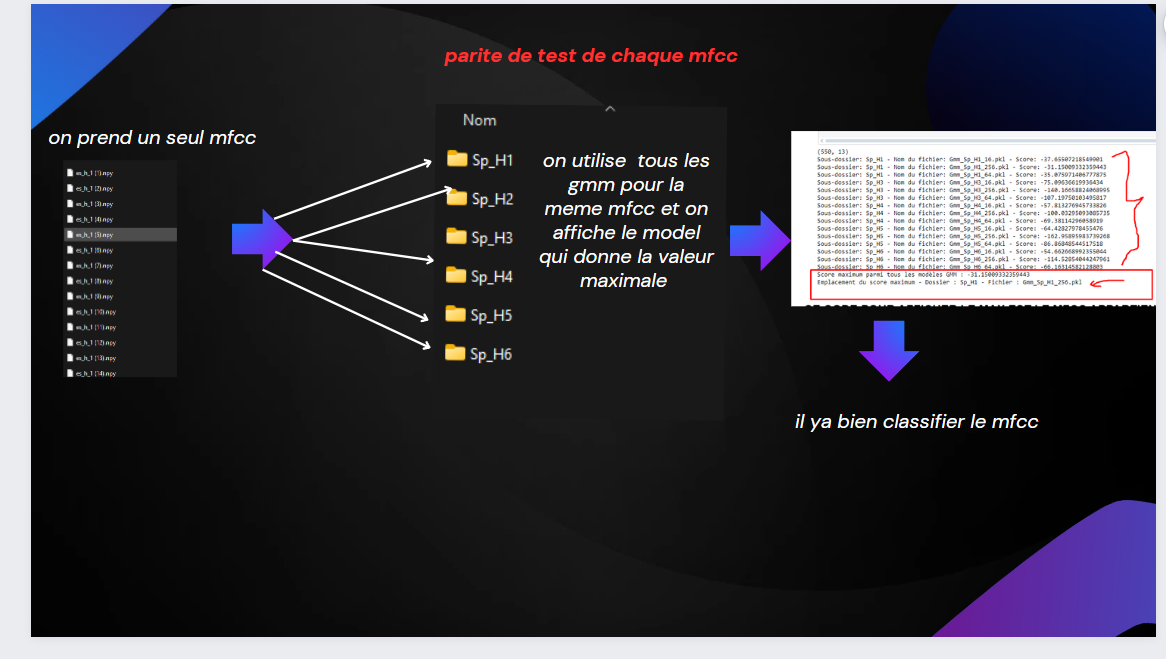

In [141]:
from joblib import *
import os
import numpy as np

# Chemin du fichier MFCC à évaluer
chemin_fichier_mfcc = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\Sp_H1\es_h_1 (1).npy"

# Charger le fichier MFCC
mfcc = np.loadtxt(chemin_fichier_mfcc)
print(np.shape(mfcc))  # Vérifier la forme de vos données MFCC

# Liste des sous-dossiers
h = ["Sp_H1", "Sp_H3", "Sp_H4", "Sp_H5", "Sp_H6"]

# Parcourir chaque sous-dossier
for sous_dossier in h:
    # Chemin du dossier contenant les fichiers .pkl
    dossier_modeles = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker\{}".format(sous_dossier)
    
    # Parcourir les fichiers .pkl dans le dossier
    for fichier in os.listdir(dossier_modeles):
        if fichier.endswith(".pkl"):
            # Charger le modèle GMM à partir du fichier
            chemin_fichier_modele = os.path.join(dossier_modeles, fichier)
            gmm = load(chemin_fichier_modele)
            
            # Calculer le score du MFCC par rapport au modèle GMM
            # Assurez-vous de remodeler vos données MFCC en 2D si nécessaire
            mfcc_2d = np.reshape(mfcc, (mfcc.shape[0], -1))
            score = gmm.score(mfcc_2d)  # Utiliser les données MFCC remodelées
            print("Sous-dossier:", sous_dossier, "- Nom du fichier:", fichier, "- Score:", score)


(550, 13)
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_16.pkl - Score: -37.65507218549901
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_256.pkl - Score: -31.15009332359443
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_64.pkl - Score: -35.075971406777875
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_16.pkl - Score: -75.09636619936434
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_256.pkl - Score: -140.16658824068995
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_64.pkl - Score: -107.19750103495817
Sous-dossier: Sp_H4 - Nom du fichier: Gmm_Sp_H4_16.pkl - Score: -57.813276945733826
Sous-dossier: Sp_H4 - Nom du fichier: Gmm_Sp_H4_256.pkl - Score: -100.03295093085735
Sous-dossier: Sp_H4 - Nom du fichier: Gmm_Sp_H4_64.pkl - Score: -69.38114296058919
Sous-dossier: Sp_H5 - Nom du fichier: Gmm_Sp_H5_16.pkl - Score: -64.42827978455476
Sous-dossier: Sp_H5 - Nom du fichier: Gmm_Sp_H5_256.pkl - Score: -162.95895983739268
Sous-dossier: Sp_H5 - Nom du fichier: Gmm_Sp_H5_64.pkl - Score: -86

# extraire Emplacement du score maximum pour un mfcc donner 

In [144]:
from joblib import *
import os
import numpy as np

# Chemin du fichier MFCC à évaluer
chemin_fichier_mfcc = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\Sp_H1\es_h_1 (1).npy"

# Charger le fichier MFCC
mfcc = np.loadtxt(chemin_fichier_mfcc)
print(np.shape(mfcc))  # Vérifier la forme de vos données MFCC

# Liste des sous-dossiers
h = ["Sp_H1", "Sp_H3", "Sp_H4", "Sp_H5", "Sp_H6"]

# Initialiser la variable pour stocker le score maximum et son emplacement
score_max = float("-inf")
dossier_score_max = None
fichier_score_max = None

# Parcourir chaque sous-dossier
for sous_dossier in h:
    # Chemin du dossier contenant les fichiers .pkl
    dossier_modeles = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker\{}".format(sous_dossier)
    
    # Parcourir les fichiers .pkl dans le dossier
    for fichier in os.listdir(dossier_modeles):
        if fichier.endswith(".pkl"):
            # Charger le modèle GMM à partir du fichier
            chemin_fichier_modele = os.path.join(dossier_modeles, fichier)
            gmm = load(chemin_fichier_modele)
            
            # Calculer le score du MFCC par rapport au modèle GMM
            # Assurez-vous de remodeler vos données MFCC en 2D si nécessaire
            mfcc_2d = np.reshape(mfcc, (mfcc.shape[0], -1))
            score = gmm.score(mfcc_2d)  # Utiliser les données MFCC remodelées
            
            # Afficher les détails du score
            print("Sous-dossier:", sous_dossier, "- Nom du fichier:", fichier, "- Score:", score)
            
            # Mettre à jour le score maximum si nécessaire
            if score > score_max:
                score_max = score
                dossier_score_max = sous_dossier
                fichier_score_max = fichier

# Afficher le score maximum parmi tous les modèles GMM et son emplacement
print("Score maximum parmi tous les modèles GMM :", score_max)
print("Emplacement du score maximum - Dossier :", dossier_score_max, "- Fichier :", fichier_score_max)


(550, 13)
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_16.pkl - Score: -37.65507218549901
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_256.pkl - Score: -31.15009332359443
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_64.pkl - Score: -35.075971406777875
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_16.pkl - Score: -75.09636619936434
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_256.pkl - Score: -140.16658824068995
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_64.pkl - Score: -107.19750103495817
Sous-dossier: Sp_H4 - Nom du fichier: Gmm_Sp_H4_16.pkl - Score: -57.813276945733826
Sous-dossier: Sp_H4 - Nom du fichier: Gmm_Sp_H4_256.pkl - Score: -100.03295093085735
Sous-dossier: Sp_H4 - Nom du fichier: Gmm_Sp_H4_64.pkl - Score: -69.38114296058919
Sous-dossier: Sp_H5 - Nom du fichier: Gmm_Sp_H5_16.pkl - Score: -64.42827978455476
Sous-dossier: Sp_H5 - Nom du fichier: Gmm_Sp_H5_256.pkl - Score: -162.95895983739268
Sous-dossier: Sp_H5 - Nom du fichier: Gmm_Sp_H5_64.pkl - Score: -86

#  CE CODE POUR AFFICHER LE MAX EST LE MFCC APPARTIENT A QUELLE LOCUTEUR 

In [240]:
from joblib import *
import os
import numpy as np

# Chemin du fichier MFCC à évaluer
chemin_fichier_mfcc = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\es_h3.txt"
# Charger le fichier MFCC
mfcc = np.loadtxt(chemin_fichier_mfcc)
print(np.shape(mfcc))  # Vérifier la forme de vos données MFCC

# Liste des sous-dossiers
h = ["Sp_H1","Sp_H2", "Sp_H3", "Sp_H4", "Sp_H5", "Sp_H6"]

# Initialiser la variable pour stocker le score maximum et son emplacement
score_max = float("-inf")
dossier_score_max = None
fichier_score_max = None

# Parcourir chaque sous-dossier
for sous_dossier in h:
    # Chemin du dossier contenant les fichiers .pkl
    dossier_modeles = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker\{}".format(sous_dossier)
    
    # Parcourir les fichiers .pkl dans le dossier
    for fichier in os.listdir(dossier_modeles):
        if fichier.endswith("256.pkl"):
            # Charger le modèle GMM à partir du fichier
            chemin_fichier_modele = os.path.join(dossier_modeles, fichier)
            gmm = load(chemin_fichier_modele)
            
            # Calculer le score du MFCC par rapport au modèle GMM
            # Assurez-vous de remodeler vos données MFCC en 2D si nécessaire
            mfcc_2d = np.reshape(mfcc, (mfcc.shape[0], -1))
            score = gmm.score(mfcc_2d)  # Utiliser les données MFCC remodelées
            
            # Afficher les détails du score
            print("Sous-dossier:", sous_dossier, "- Nom du fichier:", fichier, "- Score:", score)
            
            # Mettre à jour le score maximum si nécessaire
            if score > score_max:
                score_max = score
                dossier_score_max = sous_dossier
                fichier_score_max = fichier

# Afficher le score maximum parmi tous les modèles GMM et son emplacement
print("Score maximum parmi tous les modèles GMM :", score_max)
print("Emplacement du score maximum - Dossier :", dossier_score_max, "- Fichier :", fichier_score_max)


(39, 13)
Sous-dossier: Sp_H1 - Nom du fichier: Gmm_Sp_H1_256.pkl - Score: -46898.7475048009
Sous-dossier: Sp_H2 - Nom du fichier: Gmm_Sp_H2_256.pkl - Score: -42287.581116526606
Sous-dossier: Sp_H3 - Nom du fichier: Gmm_Sp_H3_256.pkl - Score: -43731.7524597043
Sous-dossier: Sp_H4 - Nom du fichier: Gmm_Sp_H4_256.pkl - Score: -25589.303240058987
Sous-dossier: Sp_H5 - Nom du fichier: Gmm_Sp_H5_256.pkl - Score: -20497.678751134343
Sous-dossier: Sp_H6 - Nom du fichier: Gmm_Sp_H6_256.pkl - Score: -18788.146252408325
Score maximum parmi tous les modèles GMM : -18788.146252408325
Emplacement du score maximum - Dossier : Sp_H6 - Fichier : Gmm_Sp_H6_256.pkl


# construire la matrice de confusion 

# Methodologie 

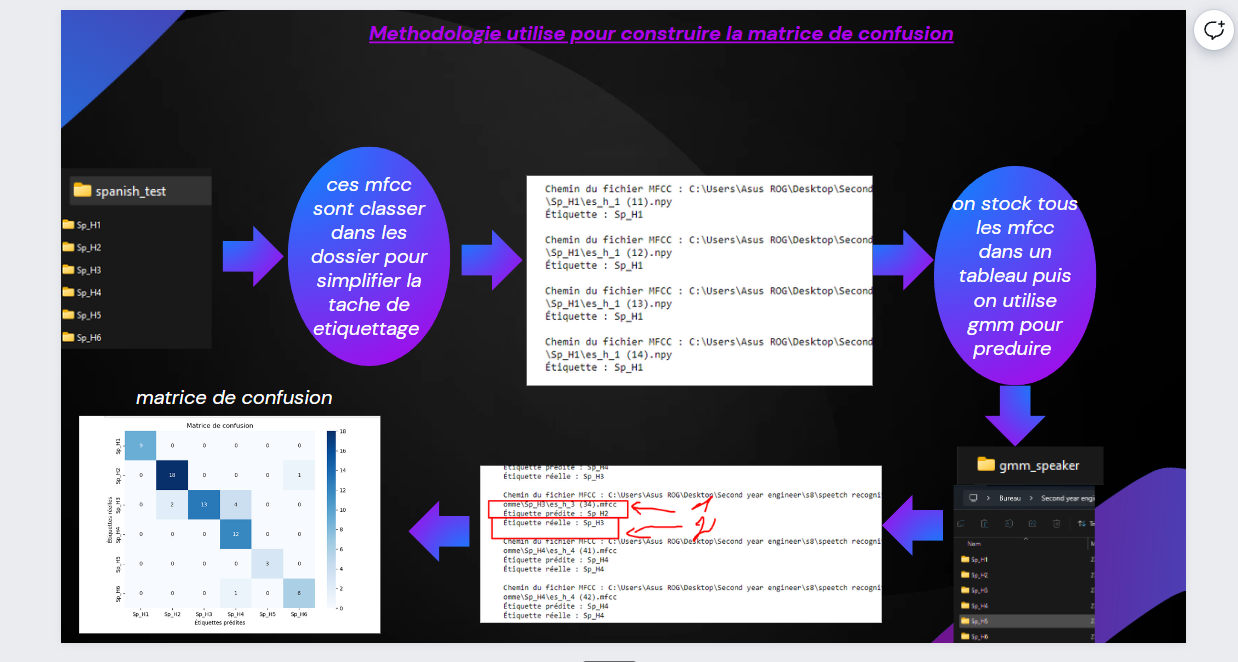

### en etiquette d'abord notre mfcc pour construire la matrice de confusion 

In [248]:
import os

# Chemin du dossier contenant les fichiers MFCC
dossier_mfcc = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme"

# Liste pour stocker les chemins des fichiers MFCC et leurs étiquettes
donnees_mfcc_etiquettes = []

# Parcourir chaque sous-dossier (étiquette)
for etiquette in os.listdir(dossier_mfcc):
    chemin_sous_dossier = os.path.join(dossier_mfcc, etiquette)
    # Vérifier si c'est un dossier
    if os.path.isdir(chemin_sous_dossier):
        # Parcourir les fichiers dans le dossier
        for fichier in os.listdir(chemin_sous_dossier):
            # Vérifier si c'est un fichier MFCC
            if fichier.endswith(('.mfcc','.npy','.txt')):
                # Stocker le chemin du fichier MFCC et son étiquette dans la liste
                chemin_fichier_mfcc = os.path.join(chemin_sous_dossier, fichier)
                donnees_mfcc_etiquettes.append((chemin_fichier_mfcc, etiquette))

# Afficher quelques exemples de données stockées
for donnee in donnees_mfcc_etiquettes[:]:
    print("Chemin du fichier MFCC :", donnee[0])
    print("Étiquette :", donnee[1])
    print()


Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\Sp_H1\es_h_1 (1).npy
Étiquette : Sp_H1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\Sp_H1\es_h_1 (10).npy
Étiquette : Sp_H1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\Sp_H1\es_h_1 (11).npy
Étiquette : Sp_H1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\Sp_H1\es_h_1 (12).npy
Étiquette : Sp_H1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\Sp_H1\es_h_1 (13).npy
Étiquette : Sp_H1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\Homme\Sp_H1\es_h_1 (14).npy
Étiquette : Sp_H1

Chemin du fichier MFCC 

In [253]:
from joblib import *
import os
import numpy as np

# Chemin du dossier contenant les fichiers MFCC
dossier_mfcc = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme"

# Liste des sous-dossiers (étiquettes)
etiquettes = ["Sp_H1","Sp_H2", "Sp_H3", "Sp_H4", "Sp_H5", "Sp_H6"]

# Initialiser le tableau pour stocker les données MFCC et les étiquettes
donnees_mfcc_etiquettes = []

# Parcourir chaque sous-dossier
for sous_dossier in etiquettes:
    # Chemin du dossier contenant les fichiers .mfcc
    chemin_dossier = os.path.join(dossier_mfcc, sous_dossier)
    
    # Parcourir les fichiers .mfcc dans le dossier
    for fichier in os.listdir(chemin_dossier):
        if fichier.endswith((".mfcc",".npy",'.txt')):
            # Chemin complet du fichier MFCC
            chemin_fichier_mfcc = os.path.join(chemin_dossier, fichier)
            
            # Ajouter les données MFCC et l'étiquette au tableau
            donnees_mfcc_etiquettes.append((chemin_fichier_mfcc, sous_dossier))

# Parcourir chaque donnée MFCC et son étiquette
for donnee in donnees_mfcc_etiquettes:
    # Charger le fichier MFCC
    mfcc = np.loadtxt(donnee[0])
    
    # Initialiser la variable pour stocker le score maximum et son emplacement
    score_max = float("-inf")
    etiquette_predite = None
    
    # Parcourir chaque modèle GMM
    for sous_dossier in etiquettes:
        # Chemin du dossier contenant les fichiers .pkl
        dossier_modeles = os.path.join(r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker", sous_dossier)
        
        # Parcourir les fichiers .pkl dans le dossier
        for fichier in os.listdir(dossier_modeles):
            if fichier.endswith("256.pkl"):
                # Charger le modèle GMM à partir du fichier
                chemin_fichier_modele = os.path.join(dossier_modeles, fichier)
                gmm = load(chemin_fichier_modele)
                
                # Calculer le score du MFCC par rapport au modèle GMM
                mfcc_2d = np.reshape(mfcc, (mfcc.shape[0], -1))
                score = gmm.score(mfcc_2d)
                
                # Mettre à jour l'étiquette prédite si nécessaire
                if score > score_max:
                    score_max = score
                    etiquette_predite = sous_dossier
    
    # Afficher l'étiquette prédite et l'étiquette réelle
    print("Chemin du fichier MFCC :", donnee[0])
    print("Étiquette prédite :", etiquette_predite)
    print("Étiquette réelle :", donnee[1])
    print()


Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H1\es_h_1 (16).mfcc
Étiquette prédite : Sp_H1
Étiquette réelle : Sp_H1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H1\es_h_1 (17).mfcc
Étiquette prédite : Sp_H1
Étiquette réelle : Sp_H1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H1\es_h_1 (18).mfcc
Étiquette prédite : Sp_H1
Étiquette réelle : Sp_H1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H1\es_h_1 (19).mfcc
Étiquette prédite : Sp_H1
Étiquette réelle : Sp_H1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H1\es_h_1 (20).mfcc
Étiquette prédite : Sp_H1
Étiquette réelle

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H3\es_h_3 (30).mfcc
Étiquette prédite : Sp_H4
Étiquette réelle : Sp_H3

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H3\es_h_3 (31).mfcc
Étiquette prédite : Sp_H2
Étiquette réelle : Sp_H3

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H3\es_h_3 (32).mfcc
Étiquette prédite : Sp_H4
Étiquette réelle : Sp_H3

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H3\es_h_3 (33).mfcc
Étiquette prédite : Sp_H4
Étiquette réelle : Sp_H3

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H3\es_h_3 (34).mfcc
Étiquette prédite : Sp_H2
Étiquette réelle

In [255]:
from sklearn.metrics import confusion_matrix

# Liste des étiquettes prédites et réelles
etiquettes_reelles = [donnees[1] for donnees in donnees_mfcc_etiquettes]
etiquettes_predites = []

# Parcourir chaque donnée MFCC et son étiquette
for donnee in donnees_mfcc_etiquettes:
    # Charger le fichier MFCC
    mfcc = np.loadtxt(donnee[0])
    
    # Initialiser la variable pour stocker le score maximum et son emplacement
    score_max = float("-inf")
    etiquette_predite = None
    
    # Parcourir chaque modèle GMM
    for sous_dossier in etiquettes:
        # Chemin du dossier contenant les fichiers .pkl
        dossier_modeles = os.path.join(r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker", sous_dossier)
        
        # Parcourir les fichiers .pkl dans le dossier
        for fichier in os.listdir(dossier_modeles):
            if fichier.endswith("256.pkl"):
                # Charger le modèle GMM à partir du fichier
                chemin_fichier_modele = os.path.join(dossier_modeles, fichier)
                gmm = load(chemin_fichier_modele)
                
                # Calculer le score du MFCC par rapport au modèle GMM
                mfcc_2d = np.reshape(mfcc, (mfcc.shape[0], -1))
                score = gmm.score(mfcc_2d)
                
                # Mettre à jour l'étiquette prédite si nécessaire
                if score > score_max:
                    score_max = score
                    etiquette_predite = sous_dossier
    
    # Ajouter l'étiquette prédite à la liste
    etiquettes_predites.append(etiquette_predite)

# Construire la matrice de confusion
matrice_confusion = confusion_matrix(etiquettes_reelles, etiquettes_predites, labels=etiquettes)

# Afficher la matrice de confusion
print("Matrice de confusion :\n", matrice_confusion)


Matrice de confusion :
 [[ 9  0  0  0  0  0]
 [ 0 18  0  0  0  1]
 [ 0  2 13  4  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  6]]


# tracer la matrice de confusion 

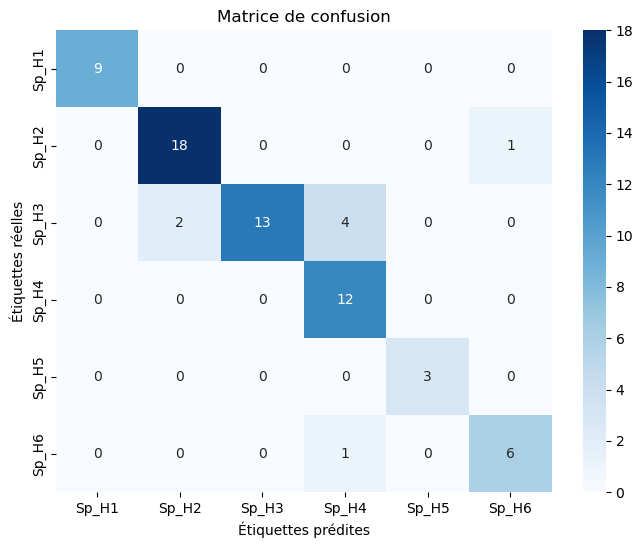

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=etiquettes, yticklabels=etiquettes)
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.title('Matrice de confusion')
plt.show()


# Partie 2 : Verification de locuteur 

# methodologie 

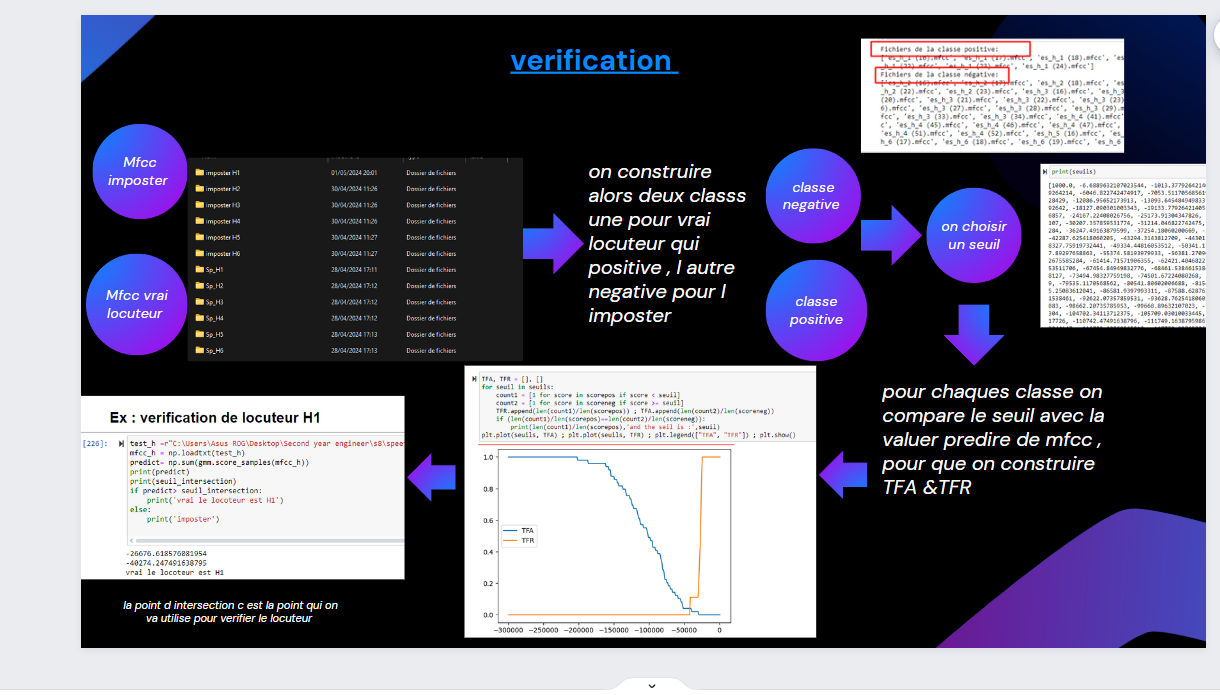

# partie de  validation 


# fonction qui verifier tous shape d un dossier 

In [25]:
import os
import numpy as np

def print_mfcc_shapes(dossier_mfcc):
    # Parcourir chaque fichier dans le dossier MFCC
    for fichier in os.listdir(dossier_mfcc):
        if fichier.endswith((".mfcc", ".npy", ".txt")):  # Assurez-vous de traiter uniquement les fichiers MFCC
            chemin_fichier_mfcc = os.path.join(dossier_mfcc, fichier)
            # Charger les données MFCC
            mfcc = np.loadtxt(chemin_fichier_mfcc)
            # Imprimer la forme des données MFCC
            print(f"Chemin du fichier MFCC : {chemin_fichier_mfcc}")
            print(f"Forme de MFCC : {mfcc.shape}")
            print()

# Exemple d'utilisation de la fonction
dossier_mfcc = r"chemin_vers_le_dossier_mfcc"
print_mfcc_shapes(dossier_faux_locuteurs)


Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\Ar_H3_5.mfcc
Forme de MFCC : (999, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\Ar_H3_6.mfcc
Forme de MFCC : (999, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\Ar_H3_7.mfcc
Forme de MFCC : (999, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\engA_H_1_1.mfcc
Forme de MFCC : (452, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\engA_H_1_2.mfcc
Forme de MFCC : (456, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\es_h_6 (19).mfcc
Forme de MFCC : (485, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\es_h_6 (20).mfcc
Forme de MFCC : (471, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\es_h_6 (21).mfcc
Forme de MFCC : (723, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\es_h_6 (22).mfcc
Forme de MFCC : (514, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\JP_F1_1.mfcc
Forme de MFCC : (424, 13)

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recogn

## construire les deux classes positive et negative

# fonction pour verifier le suille 


In [254]:
import os
import numpy as np

positive, negative = [], []
label_positives, label_negatives = [], []

def ext(chemin1, chemin2):
    global positive, negative, label_positives, label_negatives
    
    for chemin, label_list in zip([chemin1, chemin2], [positive, negative]):
        for fichier in os.listdir(chemin):
            if fichier.endswith((".mfcc", ".npy", ".txt")):
                path = os.path.join(chemin, fichier)
                mfcc = np.loadtxt(path)
                label_list.append(mfcc)
                if chemin == chemin1:
                    label_positives.append(fichier)
                else:
                    label_negatives.append(fichier)

# Exemple d'utilisation de la fonction
dossier_vrai_locuteurs = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H1"
dossier_faux_locuteurs = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1"

ext(dossier_vrai_locuteurs, dossier_faux_locuteurs)

print("Fichiers de la classe positive:")
print(label_positives)
print("Fichiers de la classe négative:")
print(label_negatives)


Fichiers de la classe positive:
['es_h_1 (16).mfcc', 'es_h_1 (17).mfcc', 'es_h_1 (18).mfcc', 'es_h_1 (19).mfcc', 'es_h_1 (20).mfcc', 'es_h_1 (21).mfcc', 'es_h_1 (22).mfcc', 'es_h_1 (23).mfcc', 'es_h_1 (24).mfcc']
Fichiers de la classe négative:
['es_h_2 (16).mfcc', 'es_h_2 (17).mfcc', 'es_h_2 (18).mfcc', 'es_h_2 (19).mfcc', 'es_h_2 (20).mfcc', 'es_h_2 (21).mfcc', 'es_h_2 (22).mfcc', 'es_h_2 (23).mfcc', 'es_h_3 (16).mfcc', 'es_h_3 (17).mfcc', 'es_h_3 (18).mfcc', 'es_h_3 (19).mfcc', 'es_h_3 (20).mfcc', 'es_h_3 (21).mfcc', 'es_h_3 (22).mfcc', 'es_h_3 (23).mfcc', 'es_h_3 (24).mfcc', 'es_h_3 (25).mfcc', 'es_h_3 (26).mfcc', 'es_h_3 (27).mfcc', 'es_h_3 (28).mfcc', 'es_h_3 (29).mfcc', 'es_h_3 (30).mfcc', 'es_h_3 (31).mfcc', 'es_h_3 (32).mfcc', 'es_h_3 (33).mfcc', 'es_h_3 (34).mfcc', 'es_h_4 (41).mfcc', 'es_h_4 (42).mfcc', 'es_h_4 (43).mfcc', 'es_h_4 (44).mfcc', 'es_h_4 (45).mfcc', 'es_h_4 (46).mfcc', 'es_h_4 (47).mfcc', 'es_h_4 (48).mfcc', 'es_h_4 (49).mfcc', 'es_h_4 (50).mfcc', 'es_h_4 (51).m

In [147]:
print("classe negative est ",negative)

classe negative est  [array([[-3.60436534e+01,  0.00000000e+00,  0.00000000e+00, ...,
         6.74820084e-14,  0.00000000e+00,  7.16946160e+00],
       [-3.60436534e+01,  0.00000000e+00,  0.00000000e+00, ...,
         6.74820084e-14,  0.00000000e+00,  7.16946160e+00],
       [-3.60436534e+01,  0.00000000e+00,  0.00000000e+00, ...,
         6.74820084e-14,  0.00000000e+00,  7.16946160e+00],
       ...,
       [ 1.07069207e+00, -2.63240459e+01, -1.16989071e+01, ...,
         6.49075448e+00, -8.18629791e+00,  7.43541320e+00],
       [-3.60436534e+01,  0.00000000e+00,  0.00000000e+00, ...,
         6.74820084e-14,  0.00000000e+00,  7.16946160e+00],
       [-3.60436534e+01,  0.00000000e+00,  0.00000000e+00, ...,
         6.74820084e-14,  0.00000000e+00,  7.16946160e+00]]), array([[-3.60436534e+01,  0.00000000e+00,  0.00000000e+00, ...,
         6.74820084e-14,  0.00000000e+00,  7.16946160e+00],
       [ 4.74025214e+00, -6.73256357e+00,  7.46068315e+00, ...,
        -1.22538233e+01,  1.6701

In [141]:
from joblib import load
chemin_modele_gmm = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker\Sp_H1\Gmm_Sp_H1_256.pkl"
gmm =load(chemin_modele_gmm)
seuils =list(np.linspace(1000, -300000, 300))

In [142]:
scorepos = [np.sum(gmm.score_samples(mfcc)) for mfcc in positive]
scoreneg = [np.sum(gmm.score_samples(mfcc)) for mfcc in negative]

In [149]:
print(scorepos)

[-26900.260011608196, -24681.245468498393, -27717.29949495862, -29278.629263600567, -41525.74209118931, -26676.618576081954, -29184.833106098118, -25865.29864289877, -25610.085656680934]


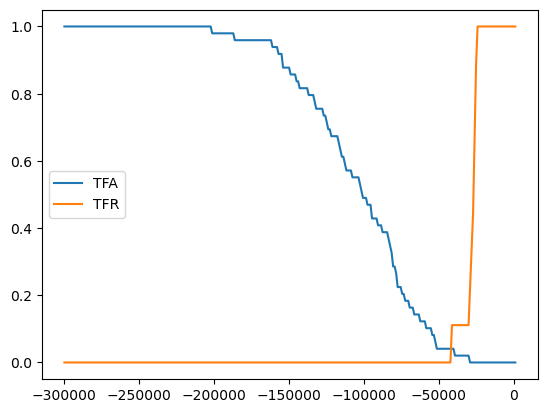

In [156]:
TFA, TFR = [], []
for seuil in seuils:
    count1 = [1 for score in scorepos if score < seuil]
    count2 = [1 for score in scoreneg if score >= seuil]
    TFR.append(len(count1)/len(scorepos)) ; TFA.append(len(count2)/len(scoreneg))
    if (len(count1)/len(scorepos)==len(count2)/len(scoreneg)):
        print(len(count1)/len(scorepos),'and the seil is :',seuil)
plt.plot(seuils, TFA) ; plt.plot(seuils, TFR) ; plt.legend(["TFA", "TFR"]) ; plt.show()

In [221]:
# Recherche du point d'intersection
seuil_intersection = None
for i in range(1, len(TFA)):
    if TFA[i] < TFR[i] and seuils[i]<-40000:
        seuil_intersection = seuils[i]
        break

# Affichage du seuil d'intersection
print("Seuil d'intersection des courbes TFA et TFR :", seuil_intersection)



Seuil d'intersection des courbes TFA et TFR : -40274.247491638795


In [222]:
print(seuils)

[1000.0, -6.6889632107023544, -1013.3779264214047, -2020.0668896321072, -3026.7558528428094, -4033.444816053512, -5040.133779264214, -6046.822742474917, -7053.511705685619, -8060.200668896321, -9066.889632107024, -10073.578595317726, -11080.267558528429, -12086.95652173913, -13093.645484949833, -14100.334448160535, -15107.023411371238, -16113.71237458194, -17120.401337792642, -18127.090301003343, -19133.77926421405, -20140.46822742475, -21147.15719063545, -22153.846153846152, -23160.535117056857, -24167.22408026756, -25173.91304347826, -26180.602006688965, -27187.290969899666, -28193.979933110368, -29200.66889632107, -30207.357859531774, -31214.046822742475, -32220.735785953177, -33227.42474916388, -34234.11371237458, -35240.802675585284, -36247.49163879599, -37254.18060200669, -38260.86956521739, -39267.5585284281, -40274.247491638795, -41280.9364548495, -42287.625418060205, -43294.3143812709, -44301.00334448161, -45307.692307692305, -46314.38127090301, -47321.070234113715, -48327.759

# Ex : verification de locuteur H1 

In [226]:
test_h =r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\Sp_H1\es_h_1 (21).mfcc"
mfcc_h = np.loadtxt(test_h)
predict= np.sum(gmm.score_samples(mfcc_h))
print(predict)
print(seuil_intersection)
if predict> seuil_intersection:
    print('vrai le locoteur est H1')
else: 
    print('imposter')


-26676.618576081954
-40274.247491638795
vrai le locoteur est H1


In [224]:
test_h =r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme\imposter H1\es_h_6 (21).mfcc"
mfcc_h = np.loadtxt(test_h)
predict= np.sum(gmm.score_samples(mfcc_h))
print(predict)
print(seuil_intersection)
if predict> seuil_intersection:
    print('vrai le locoteur est H1')
else: 
    print('imposter')


-126891.90053904924
-40274.247491638795
imposter


# extraire seuils de chaque homme spanish 

In [314]:

# Exemple d'utilisation de la fonction
dossier_vrai_locuteurs = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme"
dossier_faux_locuteurs = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Homme"
gmm_homme =  r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker"

list_homme_vrai=["Sp_H1","Sp_H2","Sp_H3","Sp_H4","Sp_H5","Sp_H6"]

list_homme_imposter=["imposter H1","imposter H2","imposter H3","imposter H4","imposter H5","imposter H6"]


In [261]:
def extraire_seuil_homme(dossier_vrai_locuteurs, dossier_faux_locuteurs,gmm_homme):
    
    for vrai, imposter in zip(list_homme_vrai, list_homme_imposter):
        positive, negative = [], []
        label_positives, label_negatives = [], []

        chemin_vrai = dossier_vrai_locuteurs + "\\" + vrai
        chemin_imposter = dossier_faux_locuteurs + "\\" + imposter
#         print("Chemin du locuteur vrai:", chemin_vrai)
#         print("Chemin du locuteur imposteur:", chemin_imposter)
        chemin_gmm = gmm_homme +"\\"+chemin_vrai+"\\"+f"Gmm_{vrai}_256.pkl"
#         print("chemin de gmm ",chemin_gmm)
        ext(chemin_vrai, chemin_imposter)
        
print("Fichiers de la classe positive:")
print(label_positives)
print("Fichiers de la classe négative:")
print(label_negatives)
    

        

extraire_seuil_homme(dossier_vrai_locuteurs, dossier_faux_locuteurs,gmm_homme)


Fichiers de la classe positive:
['es_h_1 (16).mfcc', 'es_h_1 (17).mfcc', 'es_h_1 (18).mfcc', 'es_h_1 (19).mfcc', 'es_h_1 (20).mfcc', 'es_h_1 (21).mfcc', 'es_h_1 (22).mfcc', 'es_h_1 (23).mfcc', 'es_h_1 (24).mfcc', 'Ar_H3_5.mfcc', 'Ar_H3_6.mfcc', 'Ar_H3_7.mfcc', 'engA_H_1_1.mfcc', 'engA_H_1_2.mfcc', 'engA_H_1_3.mfcc', 'es_f_1 (14).mfcc', 'es_f_1 (15).mfcc', 'es_f_1 (16).mfcc', 'es_f_1 (17).mfcc', 'es_f_2 (1).mfcc', 'es_f_2 (2).mfcc', 'es_f_2 (3).mfcc', 'JP_F1_1.mfcc', 'JP_F1_2.mfcc', 'JP_F1_3.mfcc', 'Ar_H3_5.mfcc', 'Ar_H3_6.mfcc', 'Ar_H3_7.mfcc', 'engA_H_1_1.mfcc', 'engA_H_1_2.mfcc', 'engA_H_1_3.mfcc', 'es_f_1 (14).mfcc', 'es_f_1 (15).mfcc', 'es_f_1 (16).mfcc', 'es_f_1 (17).mfcc', 'es_f_2 (1).mfcc', 'es_f_2 (2).mfcc', 'es_f_2 (3).mfcc', 'JP_F1_1.mfcc', 'JP_F1_2.mfcc', 'JP_F1_3.mfcc', 'es_h_2 (16).mfcc', 'es_h_2 (17).mfcc', 'es_h_2 (18).mfcc', 'es_h_2 (19).mfcc', 'es_h_2 (20).mfcc', 'es_h_2 (21).mfcc', 'es_h_2 (22).mfcc', 'es_h_2 (23).mfcc', 'es_h_2 (24).mfcc', 'es_h_2 (25).mfcc', 'es_h_2

In [311]:


def ext(chemin1, chemin2, positive, negative, label_positives, label_negatives):
    for chemin, label_list in zip([chemin1, chemin2], [positive, negative]):
        for fichier in os.listdir(chemin):
            if fichier.endswith((".mfcc", ".npy", ".txt")):
                path = os.path.join(chemin, fichier)
                mfcc = np.loadtxt(path)
                label_list.append(mfcc)
                if chemin == chemin1:
                    label_positives.append(fichier)
                else:
                    label_negatives.append(fichier)
    return positive, negative, label_positives, label_negatives






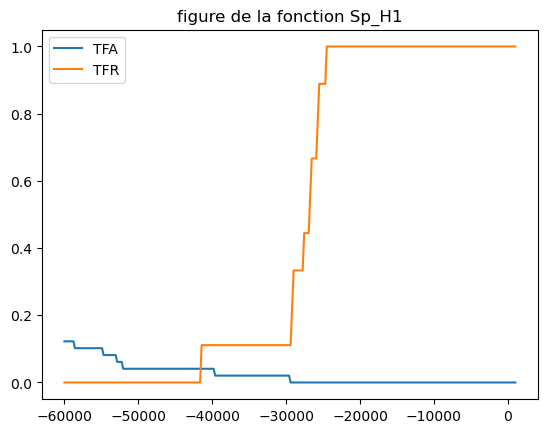

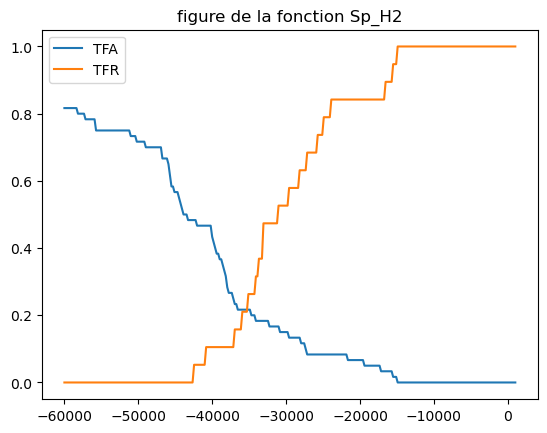

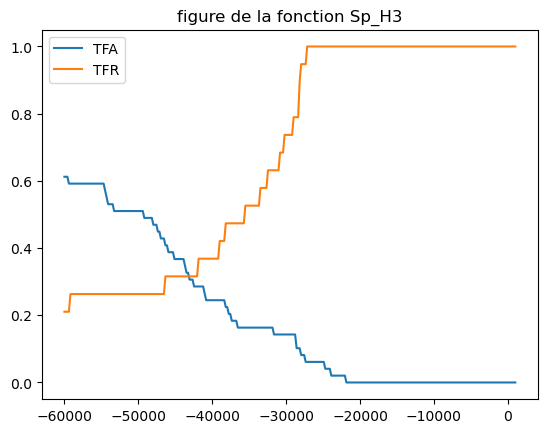

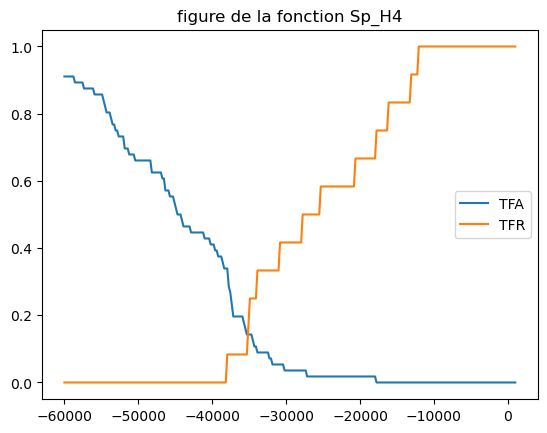

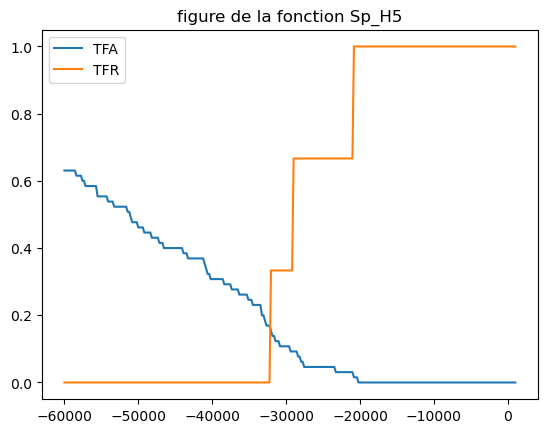

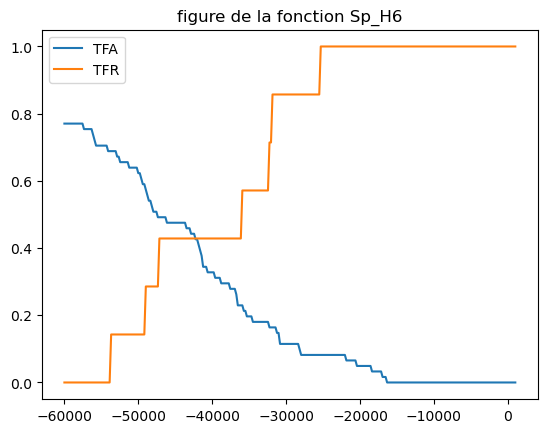

In [316]:
def extraire_seuil_homme(dossier_vrai_locuteurs, dossier_faux_locuteurs, gmm_homme):
    label_positives, label_negatives = [], []  # Déclarer les listes en dehors de la boucle

    for vrai, imposter in zip(list_homme_vrai, list_homme_imposter):
        positive, negative = [], []
        TFA, TFR = [], []
        count1, count2 = [], []
        chemin_vrai = dossier_vrai_locuteurs + "\\" + vrai
        chemin_imposter = dossier_faux_locuteurs + "\\" + imposter

        positive, negative, label_positives, label_negatives = ext(chemin_vrai, chemin_imposter, positive, negative, label_positives, label_negatives)
        
        chemin_modele_gmm = gmm_homme + "\\" + vrai + "\\" + f"Gmm_{vrai}_256.pkl"
        gmm = load(chemin_modele_gmm)  # Charger le modèle GMM
        
        # Calculer les scores pour les données positives et négatives
        scorepos = [np.sum(gmm.score_samples(mfcc)) for mfcc in positive]
        scoreneg = [np.sum(gmm.score_samples(mfcc)) for mfcc in negative]

        seuils = np.linspace(1000, -60000, 300)
        
        for seuil in seuils:
            count1 = [1 for score in scorepos if np.any(score < seuil)]
            count2 = [1 for score in scoreneg if np.any(score >= seuil)]
            TFR.append(len(count1)/len(positive))
            TFA.append(len(count2)/len(negative))
            if np.any(len(count1)/len(positive) == len(count2)/len(negative)):
                print(len(count1)/len(positive), 'and the seil is:', seuil)
        
        plt.plot(seuils, TFA)
        plt.title(f'figure de la fonction {vrai}')
        plt.plot(seuils, TFR)
        plt.legend(["TFA", "TFR"])
        plt.show()
        
#         # Imprimer les listes après chaque itération
#         print("Fichiers de la classe positive:")
#         print(label_positives)
#         print("Fichiers de la classe négative:")
#         print(label_negatives)

# Appel de la fonction
extraire_seuil_homme(dossier_vrai_locuteurs, dossier_faux_locuteurs, gmm_homme)


# les femmes spanish 

# creation de gmm 16  64 256

In [321]:
import os
import numpy as np
from sklearn.mixture import GaussianMixture
import joblib

# Liste des sous-dossiers
h = ["Sp_F1","sp_F2", "Sp_F3", "Sp_F4", "Sp_F5", "Sp_F6"]

for hnum in h:
    # Définir le chemin du dossier contenant les fichiers MFCC
    dossier_mfcc = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\Spanish\femme\{}".format(hnum)
    
    # Fonction pour charger les données MFCC à partir des fichiers dans un dossier
    def charger_mfcc(dossier):
        data = []
        for fichier in os.listdir(dossier):
            chemin_fichier = os.path.join(dossier, fichier)
            if fichier.endswith(('.npy', '.mfcc')):
                mfcc = np.loadtxt(chemin_fichier)
                data.append(mfcc)
        return np.vstack(data)

    # Charger les données MFCC à partir des fichiers dans le dossier
    X = charger_mfcc(dossier_mfcc)

    # Entraîner le modèle GMM
    nombre_composantes = 16  # Nombre de composantes du GMM
    gmm16 = GaussianMixture(n_components=nombre_composantes, covariance_type='full')
    gmm16.fit(X)
    
    # Enregistrer le modèle GMM dans un fichier
    chemin_fichier_modele = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker\{}\Gmm_{}_16.pkl".format(hnum, hnum)
    joblib.dump(gmm16, chemin_fichier_modele)


# ETIQUET LES MFCC 

In [323]:
from joblib import *
import os
import numpy as np

# Chemin du dossier contenant les fichiers MFCC
dossier_mfcc = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme"

# Liste des sous-dossiers (étiquettes)
etiquettes = ["Sp_F1","Sp_F2", "Sp_F3", "Sp_F4", "Sp_F5", "Sp_F6"]

# Initialiser le tableau pour stocker les données MFCC et les étiquettes
donnees_mfcc_etiquettes = []

# Parcourir chaque sous-dossier
for sous_dossier in etiquettes:
    # Chemin du dossier contenant les fichiers .mfcc
    chemin_dossier = os.path.join(dossier_mfcc, sous_dossier)
    
    # Parcourir les fichiers .mfcc dans le dossier
    for fichier in os.listdir(chemin_dossier):
        if fichier.endswith((".mfcc",".npy",'.txt')):
            # Chemin complet du fichier MFCC
            chemin_fichier_mfcc = os.path.join(chemin_dossier, fichier)
            
            # Ajouter les données MFCC et l'étiquette au tableau
            donnees_mfcc_etiquettes.append((chemin_fichier_mfcc, sous_dossier))

# Parcourir chaque donnée MFCC et son étiquette
for donnee in donnees_mfcc_etiquettes:
    # Charger le fichier MFCC
    mfcc = np.loadtxt(donnee[0])
    
    # Initialiser la variable pour stocker le score maximum et son emplacement
    score_max = float("-inf")
    etiquette_predite = None
    
    # Parcourir chaque modèle GMM
    for sous_dossier in etiquettes:
        # Chemin du dossier contenant les fichiers .pkl
        dossier_modeles = os.path.join(r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker", sous_dossier)
        
        # Parcourir les fichiers .pkl dans le dossier
        for fichier in os.listdir(dossier_modeles):
            if fichier.endswith("256.pkl"):
                # Charger le modèle GMM à partir du fichier
                chemin_fichier_modele = os.path.join(dossier_modeles, fichier)
                gmm = load(chemin_fichier_modele)
                
                # Calculer le score du MFCC par rapport au modèle GMM
                mfcc_2d = np.reshape(mfcc, (mfcc.shape[0], -1))
                score = gmm.score(mfcc_2d)
                
                # Mettre à jour l'étiquette prédite si nécessaire
                if score > score_max:
                    score_max = score
                    etiquette_predite = sous_dossier
    
    # Afficher l'étiquette prédite et l'étiquette réelle
    print("Chemin du fichier MFCC :", donnee[0])
    print("Étiquette prédite :", etiquette_predite)
    print("Étiquette réelle :", donnee[1])
    print()


Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F1\es_f_1 (29).mfcc
Étiquette prédite : Sp_F1
Étiquette réelle : Sp_F1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F1\es_f_1 (30).mfcc
Étiquette prédite : Sp_F1
Étiquette réelle : Sp_F1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F1\es_f_1 (31).mfcc
Étiquette prédite : Sp_F1
Étiquette réelle : Sp_F1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F1\es_f_1 (32).mfcc
Étiquette prédite : Sp_F1
Étiquette réelle : Sp_F1

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F1\es_f_1 (33).mfcc
Étiquette prédite : Sp_F1
Étiquette réelle

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F2\es_f_2 (24).mfcc
Étiquette prédite : Sp_F2
Étiquette réelle : Sp_F2

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F2\es_f_2 (25).mfcc
Étiquette prédite : Sp_F2
Étiquette réelle : Sp_F2

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F2\es_f_2 (26).mfcc
Étiquette prédite : Sp_F2
Étiquette réelle : Sp_F2

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F2\es_f_2 (27).mfcc
Étiquette prédite : Sp_F2
Étiquette réelle : Sp_F2

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F2\es_f_2 (28).mfcc
Étiquette prédite : Sp_F2
Étiquette réelle

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F3\es_f_3 (24).mfcc
Étiquette prédite : Sp_F3
Étiquette réelle : Sp_F3

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F3\es_f_3 (25).mfcc
Étiquette prédite : Sp_F3
Étiquette réelle : Sp_F3

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F3\es_f_3 (26).mfcc
Étiquette prédite : Sp_F3
Étiquette réelle : Sp_F3

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F3\es_f_3 (27).mfcc
Étiquette prédite : Sp_F3
Étiquette réelle : Sp_F3

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F3\es_f_3 (28).mfcc
Étiquette prédite : Sp_F3
Étiquette réelle

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F4\es_f_4 (28).mfcc
Étiquette prédite : Sp_F4
Étiquette réelle : Sp_F4

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F4\es_f_4 (29).mfcc
Étiquette prédite : Sp_F4
Étiquette réelle : Sp_F4

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F4\es_f_4 (30).mfcc
Étiquette prédite : Sp_F4
Étiquette réelle : Sp_F4

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F4\es_f_4 (31).mfcc
Étiquette prédite : Sp_F4
Étiquette réelle : Sp_F4

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F4\es_f_4 (32).mfcc
Étiquette prédite : Sp_F4
Étiquette réelle

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F5\es_f_5 (28).mfcc
Étiquette prédite : Sp_F5
Étiquette réelle : Sp_F5

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F5\es_f_5 (29).mfcc
Étiquette prédite : Sp_F5
Étiquette réelle : Sp_F5

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F5\es_f_5 (30).mfcc
Étiquette prédite : Sp_F6
Étiquette réelle : Sp_F5

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F5\es_f_5 (31).mfcc
Étiquette prédite : Sp_F5
Étiquette réelle : Sp_F5

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F5\es_f_5 (32).mfcc
Étiquette prédite : Sp_F5
Étiquette réelle

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F6\es_f_6 (23).mfcc
Étiquette prédite : Sp_F6
Étiquette réelle : Sp_F6

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F6\es_f_6 (24).mfcc
Étiquette prédite : Sp_F6
Étiquette réelle : Sp_F6

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F6\es_f_6 (25).mfcc
Étiquette prédite : Sp_F6
Étiquette réelle : Sp_F6

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F6\es_f_6 (26).mfcc
Étiquette prédite : Sp_F6
Étiquette réelle : Sp_F6

Chemin du fichier MFCC : C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\femme\Sp_F6\es_f_6 (27).mfcc
Étiquette prédite : Sp_F6
Étiquette réelle

In [324]:
from sklearn.metrics import confusion_matrix

# Liste des étiquettes prédites et réelles
etiquettes_reelles = [donnees[1] for donnees in donnees_mfcc_etiquettes]
etiquettes_predites = []

# Parcourir chaque donnée MFCC et son étiquette
for donnee in donnees_mfcc_etiquettes:
    # Charger le fichier MFCC
    mfcc = np.loadtxt(donnee[0])
    
    # Initialiser la variable pour stocker le score maximum et son emplacement
    score_max = float("-inf")
    etiquette_predite = None
    
    # Parcourir chaque modèle GMM
    for sous_dossier in etiquettes:
        # Chemin du dossier contenant les fichiers .pkl
        dossier_modeles = os.path.join(r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker", sous_dossier)
        
        # Parcourir les fichiers .pkl dans le dossier
        for fichier in os.listdir(dossier_modeles):
            if fichier.endswith("256.pkl"):
                # Charger le modèle GMM à partir du fichier
                chemin_fichier_modele = os.path.join(dossier_modeles, fichier)
                gmm = load(chemin_fichier_modele)
                
                # Calculer le score du MFCC par rapport au modèle GMM
                mfcc_2d = np.reshape(mfcc, (mfcc.shape[0], -1))
                score = gmm.score(mfcc_2d)
                
                # Mettre à jour l'étiquette prédite si nécessaire
                if score > score_max:
                    score_max = score
                    etiquette_predite = sous_dossier
    
    # Ajouter l'étiquette prédite à la liste
    etiquettes_predites.append(etiquette_predite)

# Construire la matrice de confusion
matrice_confusion = confusion_matrix(etiquettes_reelles, etiquettes_predites, labels=etiquettes)

# Afficher la matrice de confusion
print("Matrice de confusion :\n", matrice_confusion)


Matrice de confusion :
 [[34  0  0  0  0  0]
 [ 0 39  0  0  0  3]
 [ 0  0 37  0  0  0]
 [ 0  0  0 43  0  2]
 [ 7  0  0  0 35  1]
 [ 0  0  0  0  0 45]]


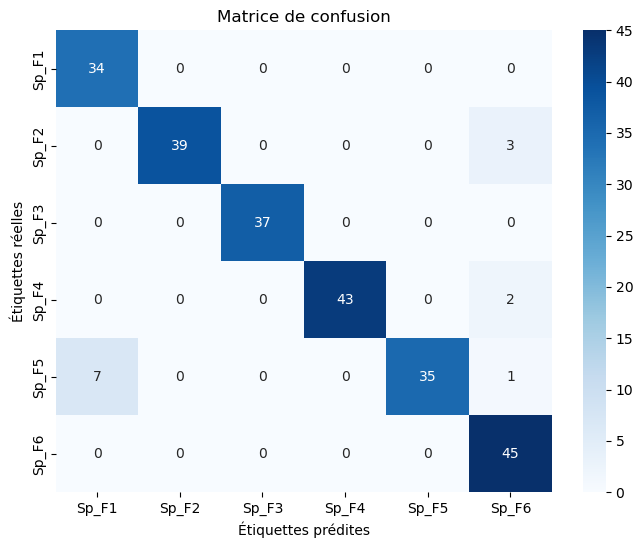

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=etiquettes, yticklabels=etiquettes)
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.title('Matrice de confusion')
plt.show()


# chercher les seuil de chaque femme 

In [327]:

# Exemple d'utilisation de la fonction
dossier_vrai_locuteurs = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Femme"
dossier_faux_locuteurs = r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\Mfcc_Speaker\spanish_test\Femme"
gmm_homme =  r"C:\Users\Asus ROG\Desktop\Second year engineer\s8\speetch recognition\gmm_speaker"

list_homme_vrai=["Sp_F1","Sp_F2","Sp_F3","Sp_F4","Sp_F5","Sp_F6"]

list_homme_imposter=["imposter F1","imposter F2","imposter F3","imposter F4","imposter F5","imposter F6"]


In [328]:


def ext(chemin1, chemin2, positive, negative, label_positives, label_negatives):
    for chemin, label_list in zip([chemin1, chemin2], [positive, negative]):
        for fichier in os.listdir(chemin):
            if fichier.endswith((".mfcc", ".npy", ".txt")):
                path = os.path.join(chemin, fichier)
                mfcc = np.loadtxt(path)
                label_list.append(mfcc)
                if chemin == chemin1:
                    label_positives.append(fichier)
                else:
                    label_negatives.append(fichier)
    return positive, negative, label_positives, label_negatives






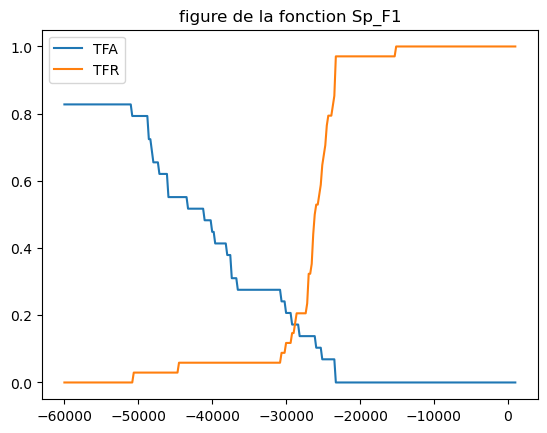

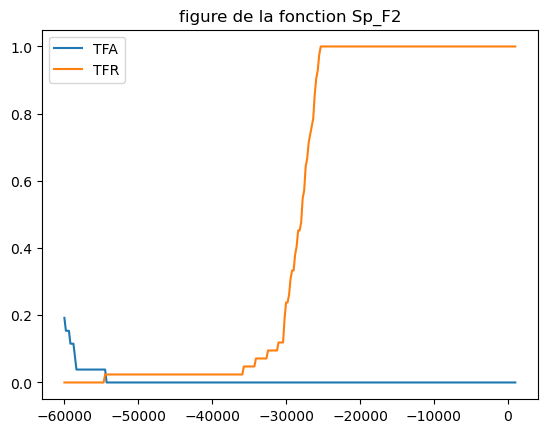

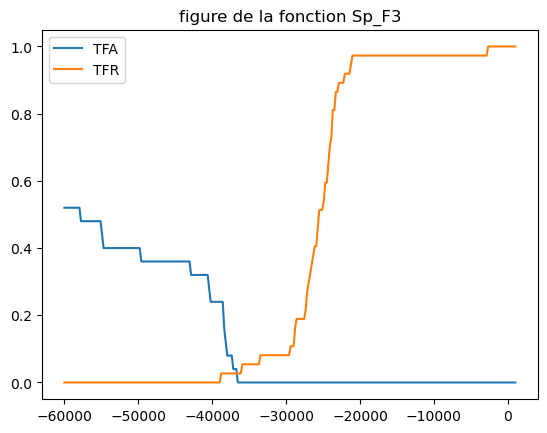

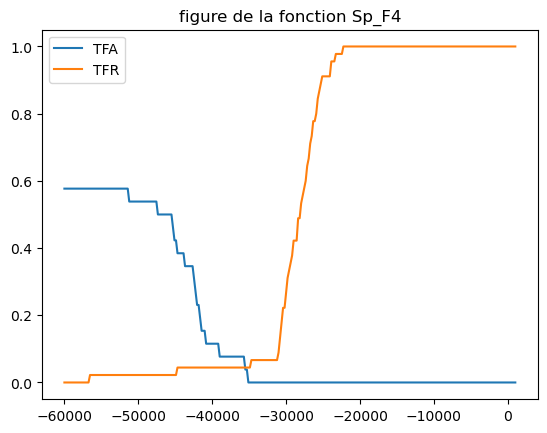

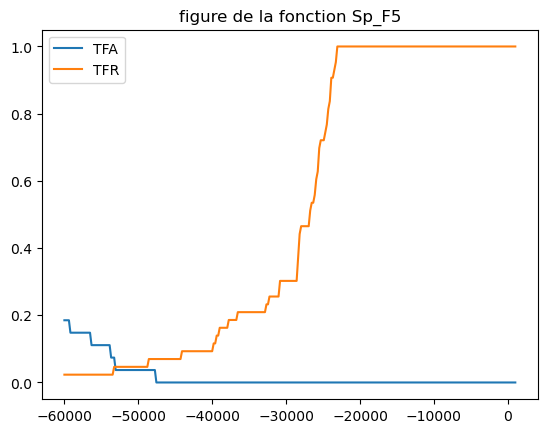

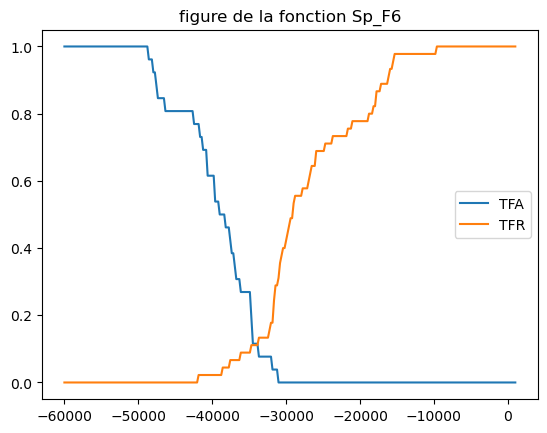

In [329]:
def extraire_seuil_homme(dossier_vrai_locuteurs, dossier_faux_locuteurs, gmm_homme):
    label_positives, label_negatives = [], []  # Déclarer les listes en dehors de la boucle

    for vrai, imposter in zip(list_homme_vrai, list_homme_imposter):
        positive, negative = [], []
        TFA, TFR = [], []
        count1, count2 = [], []
        chemin_vrai = dossier_vrai_locuteurs + "\\" + vrai
        chemin_imposter = dossier_faux_locuteurs + "\\" + imposter

        positive, negative, label_positives, label_negatives = ext(chemin_vrai, chemin_imposter, positive, negative, label_positives, label_negatives)
        
        chemin_modele_gmm = gmm_homme + "\\" + vrai + "\\" + f"Gmm_{vrai}_256.pkl"
        gmm = load(chemin_modele_gmm)  # Charger le modèle GMM
        
        # Calculer les scores pour les données positives et négatives
        scorepos = [np.sum(gmm.score_samples(mfcc)) for mfcc in positive]
        scoreneg = [np.sum(gmm.score_samples(mfcc)) for mfcc in negative]

        seuils = np.linspace(1000, -60000, 300)
        
        for seuil in seuils:
            count1 = [1 for score in scorepos if np.any(score < seuil)]
            count2 = [1 for score in scoreneg if np.any(score >= seuil)]
            TFR.append(len(count1)/len(positive))
            TFA.append(len(count2)/len(negative))
            if np.any(len(count1)/len(positive) == len(count2)/len(negative)):
                print(len(count1)/len(positive), 'and the seil is:', seuil)
        
        plt.plot(seuils, TFA)
        plt.title(f'figure de la fonction {vrai}')
        plt.plot(seuils, TFR)
        plt.legend(["TFA", "TFR"])
        plt.show()
        
#         # Imprimer les listes après chaque itération
#         print("Fichiers de la classe positive:")
#         print(label_positives)
#         print("Fichiers de la classe négative:")
#         print(label_negatives)

# Appel de la fonction
extraire_seuil_homme(dossier_vrai_locuteurs, dossier_faux_locuteurs, gmm_homme)
